In [20]:
import math 

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm.auto import tqdm, trange
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
from sklearn.preprocessing import StandardScaler

In [97]:
def get_vals(name: str, i: int):
    with open(f'outputs/{name}/embeddings.{i}.tsv') as f:
        vals = []
        names = []

        for line in f:
            name, *l = line.rstrip('\n').split('\t')

            names.append(name)
            vals.append([float(i) for i in l])
        
    return pd.DataFrame(vals, index=names)

In [105]:
df = get_vals('20210525120316', 0)

  0%|          | 0/16 [00:00<?, ?it/s]

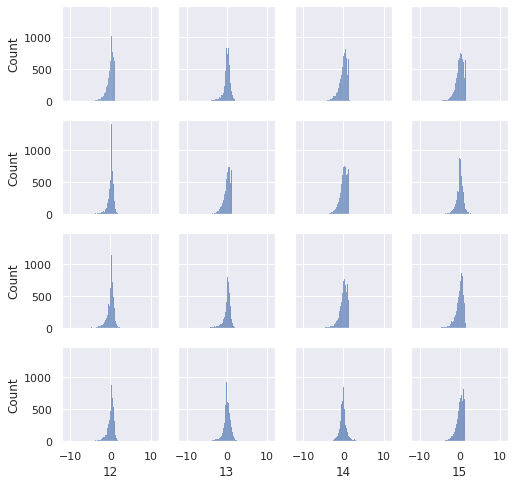

In [106]:
edge = math.ceil(math.sqrt(len(df.columns)))
graph_size = 2
fig, axs = plt.subplots(edge, edge, figsize=(edge * graph_size, edge * graph_size), sharex=True, sharey=True)

for dim, ax in zip(tqdm(df.columns), axs.flatten()):
    sns.histplot(df[dim], ax=ax)

    # ax.set(yscale='log')

In [107]:
sample = df.sample(1000)

In [108]:
similarities = cosine_similarity(sample).flatten()
distances = euclidean_distances(sample).flatten()

<AxesSubplot:ylabel='Count'>

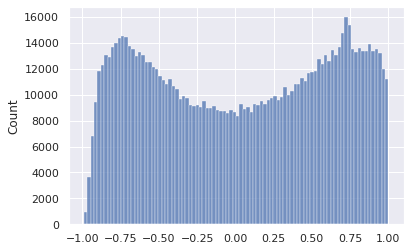

In [109]:
sns.histplot(similarities)

<AxesSubplot:ylabel='Count'>

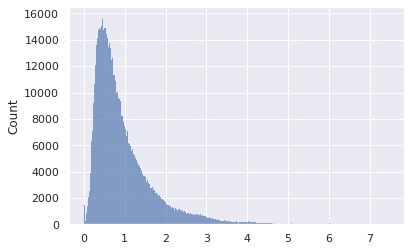

In [104]:
sns.histplot(distances)

In [25]:
import torch

weights = torch.load('outputs/20210525120316/model-weights.pt')

In [41]:
sns.set()

<AxesSubplot:>

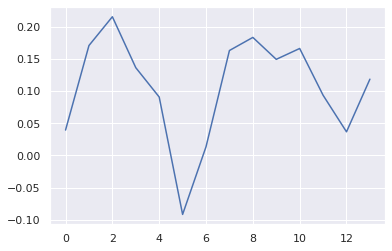

In [47]:
sns.lineplot(y=weights['last.bias'], x=range(len(weights['last.bias'])))

<AxesSubplot:>

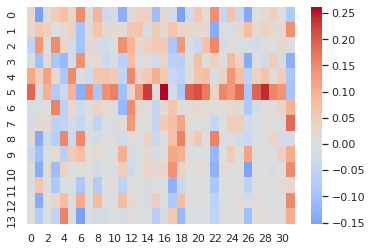

In [48]:
sns.heatmap(weights['last.weight'], cmap='coolwarm', center=0)

<AxesSubplot:ylabel='Count'>

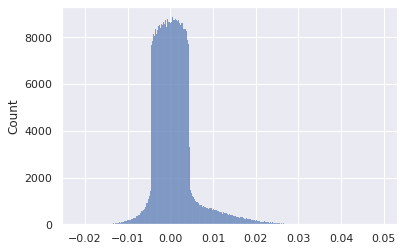

In [55]:
sns.histplot(weights['first.weight'].flatten())

<AxesSubplot:>

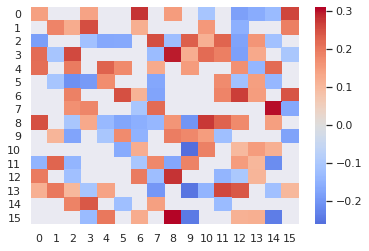

In [90]:
w = weights['embedding_layer_5.weight'].numpy()

clamp = 0.1

sns.heatmap(w, cmap='coolwarm', center=0, mask=(w > -clamp) & (w < clamp))

In [50]:
{k: v.shape for k, v in weights.items()}

{'first.weight': torch.Size([16, 50509]),
 'first.bias': torch.Size([16]),
 'embedding_layer_0.weight': torch.Size([16, 16]),
 'embedding_layer_0.bias': torch.Size([16]),
 'embedding_layer_1.weight': torch.Size([16, 16]),
 'embedding_layer_1.bias': torch.Size([16]),
 'embedding_layer_2.weight': torch.Size([16, 16]),
 'embedding_layer_2.bias': torch.Size([16]),
 'embedding_layer_3.weight': torch.Size([16, 16]),
 'embedding_layer_3.bias': torch.Size([16]),
 'embedding_layer_4.weight': torch.Size([16, 16]),
 'embedding_layer_4.bias': torch.Size([16]),
 'embedding_layer_5.weight': torch.Size([16, 16]),
 'embedding_layer_5.bias': torch.Size([16]),
 'mixer_layer_0.weight': torch.Size([32, 32]),
 'mixer_layer_0.bias': torch.Size([32]),
 'mixer_layer_1.weight': torch.Size([32, 32]),
 'mixer_layer_1.bias': torch.Size([32]),
 'last.weight': torch.Size([14, 32]),
 'last.bias': torch.Size([14])}